In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
df = pd.read_excel('Downloads/Telco_customer_churn.xlsx')

In [11]:
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [12]:
# DATA CLEANING

In [13]:
# fix duplicates
# handle nulls/missing values
# standardising data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Handling Duplicates

In [16]:
duplicates = df[df.duplicated()]

In [17]:
duplicates 

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason


In [18]:
# no duplicates

Handling missing values

In [20]:
df['Churn Reason'] = df['Churn Reason'].fillna('unknown')

In [21]:
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,unknown
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,unknown
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,unknown
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,unknown


In [22]:
# NaN values with 'Unknown' on df['Churn Reason'] column.

Handling inconsistency in Numeric Column

In [24]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [26]:
df['Total Charges'] = df['Total Charges'].fillna(df['Total Charges'].median())

In [27]:
#filled missing values in df['Total Charges'] with median value

EXPLORATORY DATA ANALYSIS

1. Churn Rate Calculation

In [70]:
total_customers = df.shape[0]
churned_customers = df[df['Churn Label'] == 'Yes'].shape[0]
churn_rate = churned_customers / total_customers

In [72]:
print(f"Overall Churn Rate: {churn_rate:.2%}")

Overall Churn Rate: 26.54%


In [74]:
#Insight: The overall churn rate is around 26.5%, which indicates that more than 1 in 4 customers are leaving.

#Recommendation: Prioritize churn reduction strategies, especially in high-risk segments, to improve customer lifetime value and reduce acquisition costs.

2. Churn Distribution

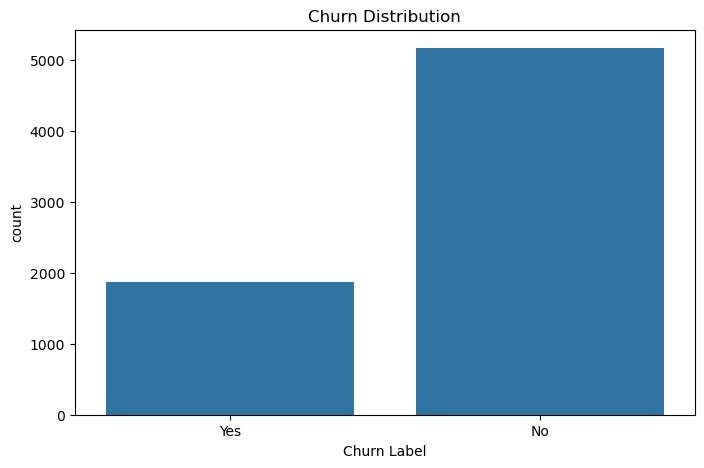

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn Label', data=df)
plt.title("Churn Distribution")
plt.show()

In [96]:
#Insight: 5174 customers (≈73%) stayed, 1869 customers (≈27%) churned

3. Monthly Charges vs Churn

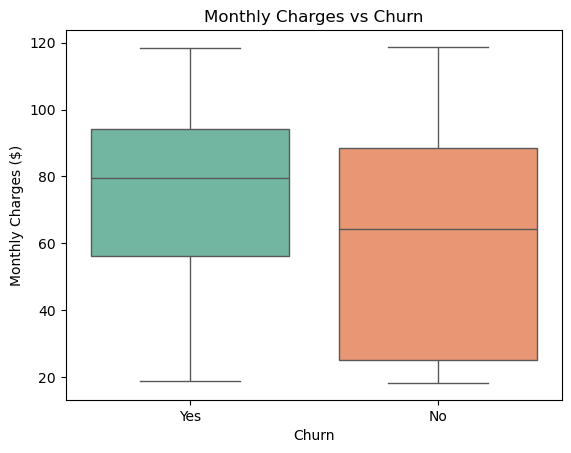

In [94]:
sns.boxplot(x='Churn Label', y='Monthly Charges', data=df, hue='Churn Label', legend=False, palette='Set2')
plt.title('Monthly Charges vs Churn')
plt.ylabel('Monthly Charges ($)')
plt.xlabel('Churn')
plt.show()

In [ ]:
#Insight: 
#1. Customers with high monthly charges are more likely to churn.

#Recommendation:

#1. Introduce value-added services (priority support, discounts on bundles).

#2. Offer personalized loyalty perks to justify the price (e.g., free add-ons for long-term users).

#3. Send price satisfaction surveys to understand perceived value.

4. Churn Rate by Contract Type

In [36]:
# Group and calculate churn rate

In [37]:
churn_by_contract = df.groupby('Contract')['Churn Label'].value_counts(normalize=True).unstack().fillna(0)
churn_by_contract['Churn Rate'] = churn_by_contract['Yes']
churn_by_contract = churn_by_contract.sort_values('Churn Rate', ascending=False)

In [38]:
# plot Churn Rate by Contract

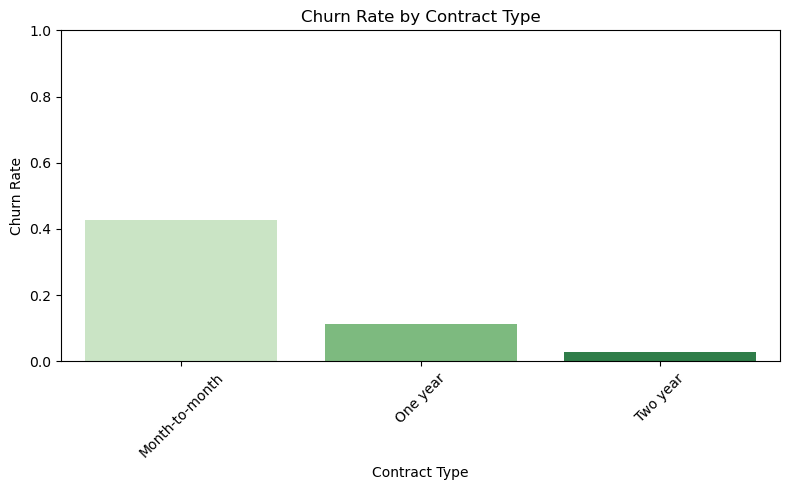

In [68]:
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_by_contract.index, y=churn_by_contract['Churn Rate'], hue =churn_by_contract.index, legend=False, palette='Greens')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.xlabel('Contract Type')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
#Insight: 
#1. Customers with Month-to-month contracts show the highest churn rate.

#2. One-year and Two-year contract holders have significantly lower churn rates.

#Recommendation:

#1. Introduce incentives (e.g., discounts or bundled services) to move customers from monthly to long-term contracts.

#2. Improve onboarding and retention messaging for month-to-month users.

4. Churn Rate by Payment Method

In [ ]:
# Group and calculate churn rate

In [46]:
churn_by_payment_method = df.groupby('Payment Method')['Churn Label'].value_counts(normalize=True).unstack().fillna(0)
churn_by_payment_method['Churn Rate'] = churn_by_payment_method['Yes']
churn_by_payment_method = churn_by_payment_method.sort_values('Churn Rate', ascending=False)

In [ ]:
# Plot Churn Rate by Payment Method

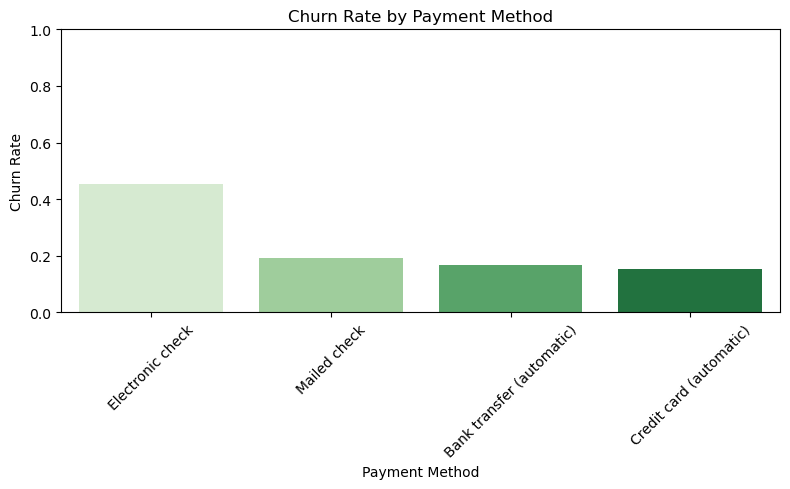

In [64]:
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_by_payment_method.index, y=churn_by_payment_method['Churn Rate'], hue =churn_by_payment_method.index, legend=False, palette='Greens')
plt.title('Churn Rate by Payment Method')
plt.ylabel('Churn Rate')
plt.xlabel('Payment Method')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [78]:
#Insight:
#1. Electronic check users have the highest churn rate.

#2. Users with automatic payments (e.g., credit card, bank transfer) show better retention.

#Recommendation:

#1. Encourage auto-payment enrollment via offers or loyalty rewards.

#2. Investigate friction points in the Electronic Check process.

5.  Churn Rate by Internet Service

In [ ]:
# Group and calculate churn rate

In [56]:
churn_by_internet_service = df.groupby('Internet Service')['Churn Label'].value_counts(normalize=True).unstack().fillna(0)
churn_by_internet_service['Churn Rate'] = churn_by_internet_service['Yes']
churn_by_internet_service = churn_by_internet_service.sort_values('Churn Rate', ascending=False)

In [ ]:
# Plot Churn Rate by Internet Service

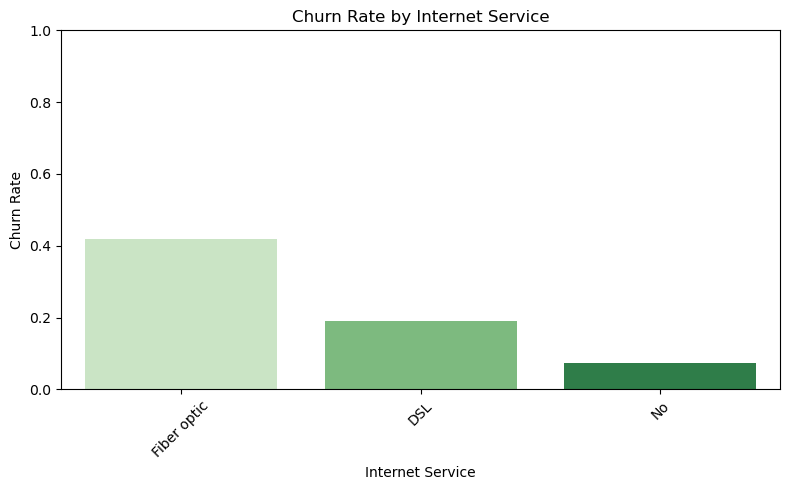

In [60]:
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_by_internet_service.index, y=churn_by_internet_service['Churn Rate'],  hue=churn_by_internet_service.index, legend=False, palette='Greens')
plt.title('Churn Rate by Internet Service')
plt.ylabel('Churn Rate')
plt.xlabel('Internet Service')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [80]:
#Insight:
#1. Fiber optic users churn more frequently than DSL or (No) customers without internet.

#2. No Internet service users have the lowest churn (likely due to basic phone service).

#Recommendation:

#1. Investigate Fiber service satisfaction — look into outages, customer support, or price sensitivity.

#2. Consider upselling DSL users rather than acquiring more high-churn Fiber customers.

6. Churn Rate Heatmap by Contract Type and Payment Method

In [84]:
# Create a pivot table showing churn rate

In [82]:
heatmap_data = df.pivot_table(
    index='Contract',
    columns='Payment Method',
    values='Churn Label',
    aggfunc=lambda x: (x == 'Yes').mean()
)


In [88]:
# Plot the heatmap

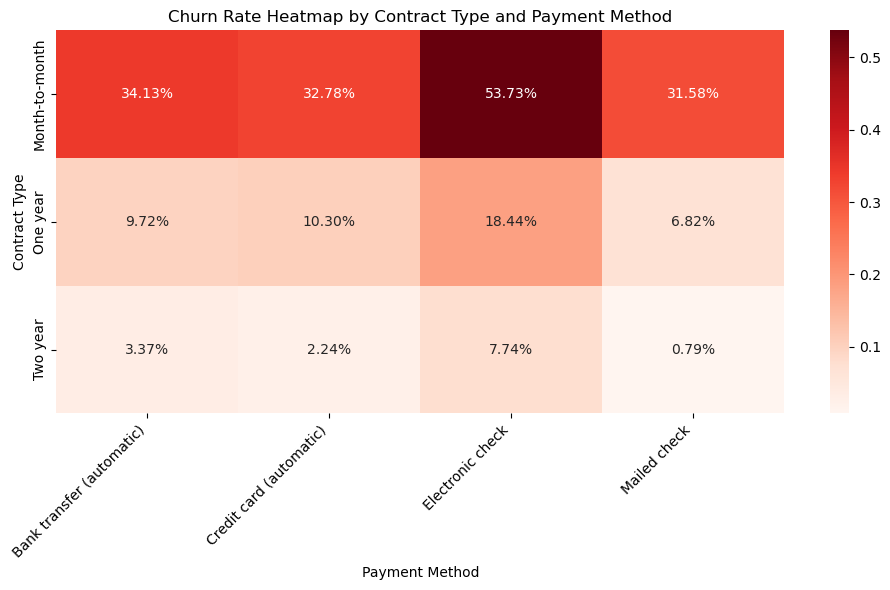

In [86]:
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2%", cmap='Reds')
plt.title('Churn Rate Heatmap by Contract Type and Payment Method')
plt.ylabel('Contract Type')
plt.xlabel('Payment Method')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [90]:
#Insight:
#1. Month-to-month users paying by Electronic Check are most likely to churn.

#2. Two-year contracts with auto-pay methods have the lowest churn.

#Recommendation:

#1. Build segment-specific retention campaigns: target risky groups with discounts, loyalty offers, or dedicated support.

#2. Promote stable pairings (e.g., 2-Year + Auto-pay) in marketing campaigns.

7. Predictive Analysis

In [181]:
# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [183]:
# Features and target
X = df.drop('Churn Label', axis=1)
y = df['Churn Label']

In [187]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [201]:
# Model training
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [203]:
# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

C:\Users\BELIEVE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression ---
[[1035    0]
 [   2  372]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      0.99      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

--- Random Forest ---
[[1035    0]
 [   0  374]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



C:\Users\BELIEVE\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:58:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBoost ---
[[1035    0]
 [   0  374]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



In [197]:
df.to_excel("cleaned_new_telco.xlsx", index=False)